<a href="https://colab.research.google.com/github/Twujira/TigistData110/blob/main/TW_Titanic_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

In this assignment, you'll delve into the Titanic dataset to explore the relationship between passengers' ages, their survival status, and gender. You'll employ various data visualization techniques, including histograms, pyramid-style plots, and Kernel Density Estimate (KDE) plots, to uncover insights into how these factors influenced survival rates.

## Objectives

- Analyze age distribution among Titanic passengers.
- Examine survival rates based on age, gender, and passenger class.
- Visualize age distribution among survivors and non-survivors using pyramid-style and KDE plots.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Instructions

### 1. Load the Dataset

Load the Titanic dataset from Seaborn and familiarize yourself with its structure, especially the 'age', 'sex', 'survived', and 'class' columns.

In [51]:
titanic_df=pd.read_csv('https://raw.githubusercontent.com/Twujira/TigistData110/main/Dataset/titanic%20(1).csv')
titanic_df.head()

,class,age,sex,survived
0,1st,29.00,female,survived
1,1st,2.00,female,died
2,1st,30.00,male,died
3,1st,25.00,female,died
4,1st,0.92,male,survived


In [52]:
dt=sns.load_dataset('titanic')
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 2. Exploratory Data Analysis (EDA)

Perform an initial analysis to understand the survival rate:

- Calculate and compare the overall survival rate to the survival rates by gender.
- Explore the age distribution of the dataset.
- Analyze survival rates by passenger class.

In [53]:
#Survival Rate
survival_rate = dt['survived'].mean()
print(f"Survival Rate: {survival_rate * 100:.2f}%")

Survival Rate: 38.38%


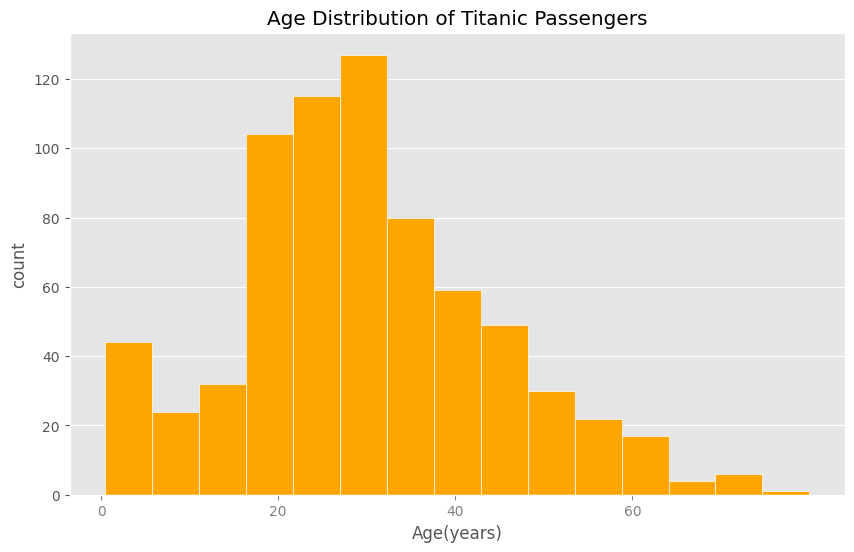

In [83]:
# Create a histogram for the age distribution
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.hist(dt['age'], bins=15, color='orange',edgecolor='white')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age(years)')
plt.ylabel('count')
plt.grid(axis='x')
plt.xticks([0, 20, 40, 60])
plt.tick_params(axis='x', colors='grey')  # Set x-axis tick colors to gray
plt.show()

In [55]:
#Number of passenger per class

survival_rate_perClass = dt['pclass'].value_counts()
print(survival_rate_perClass)

3    491
1    216
2    184
Name: pclass, dtype: int64


3. Visualizing Age Distribution by Survival Status
  
  3.1 Histograms for Age Distribution
Create histograms to compare the age distributions of survivors and non-survivors.

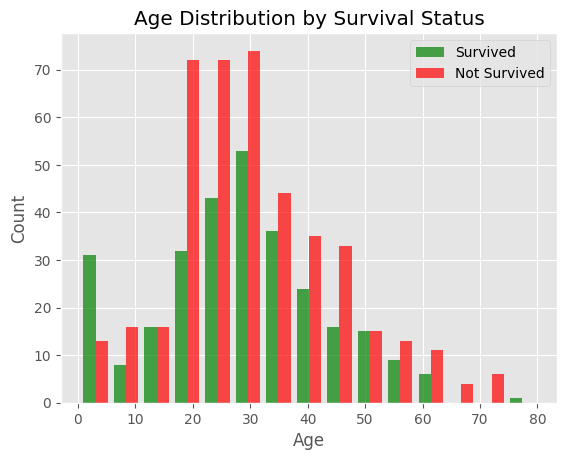

In [91]:
survived_age = dt['age'][dt['survived'] == 1]
not_survived_age = dt['age'][dt['survived'] == 0]

# Plotting the histogram for each survival status
plt.hist([survived_age, not_survived_age], bins=15, color=['green', 'red'], alpha=0.7, label=['Survived', 'Not Survived'])

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

The number of death is high at all age groups. Especially, in between age 30 to 40 is very high. Although both the number of survivors and deaths are high in that age group.

3.2 Pyramid-style Age Distribution

Construct a pyramid-style plot to compare age distributions between survivors and non-survivors. This visualization will help highlight which age groups were more likely to survive.

In [57]:
# Distribution of passengers age by gender.
ages_male = dt[dt['sex'] == 'male']['age']
ages_female = titanic_df[titanic_df['sex'] == 'female']['age']

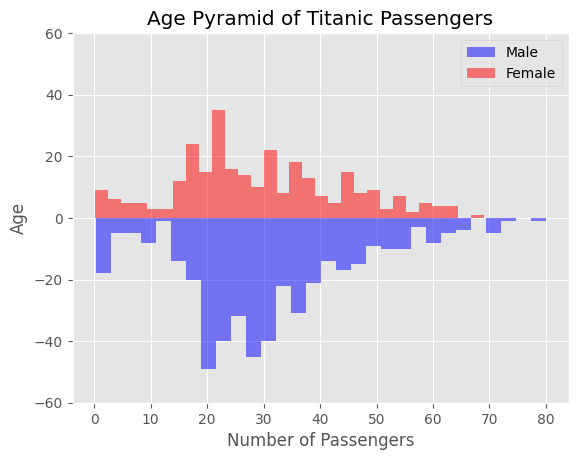

In [58]:
#plt.figure(figsize=(10, 6))

# Plot the male histogram on the left by multiplying by -1 to mirror the males on the left side
plt.hist(ages_male, bins=30, label='Male', alpha=0.5, color='blue', weights=[-1]*len(ages_male))

# Plot the female histogram on the right
plt.hist(ages_female, bins=30, label='Female', alpha=0.5, color='red')

# Add labels and title
plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers')
plt.legend(loc='upper right')

# Fix the y-axis labels to be absolute values for clarity
plt.yticks([-60,-40,-20,0, 20, 40, 60])

plt.show()

3.3 KDE Plots for Survival by Age ( for male, female and total)

KDE Plot for Survival by Age: Visualize the age distribution for survivors and non-survivors using KDE plots. This will provide a smooth estimate of the age distributions.

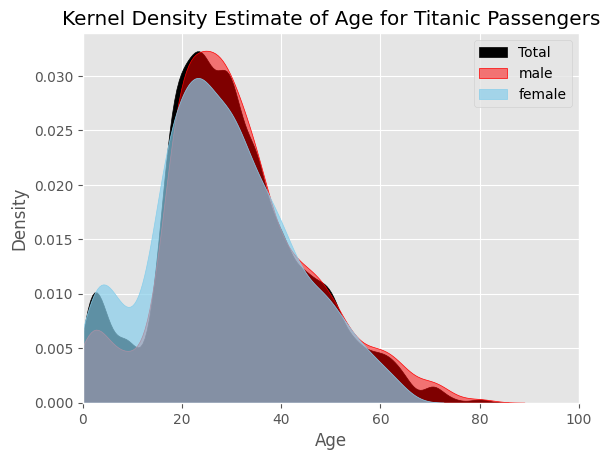

In [59]:
# KDE for total passengers
sns.kdeplot(dt['age'], bw_adjust=0.5, fill=True, color="Black", alpha=1, label='Total')
# KDE for total passengers
sns.kdeplot(dt[dt['sex'] == 'male']['age'], bw_adjust=0.7, fill=True, color="Red", alpha=0.5, label='male')

# KDE for male passengers
sns.kdeplot(dt[dt['sex'] == 'female']['age'], bw_adjust=0.7, fill=True, color="Skyblue", alpha=0.7, label='female')

plt.title('Kernel Density Estimate of Age for Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend() # Add a legend to distinguish the lines
plt.xlim(0, 100)  # Set x-axis limits for clarity
plt.show()

4. Bar Graphs for Passenger Class

4.1 Bar Graph of Passenger Class

Create a bar graph to show the distribution of passengers across different classes.

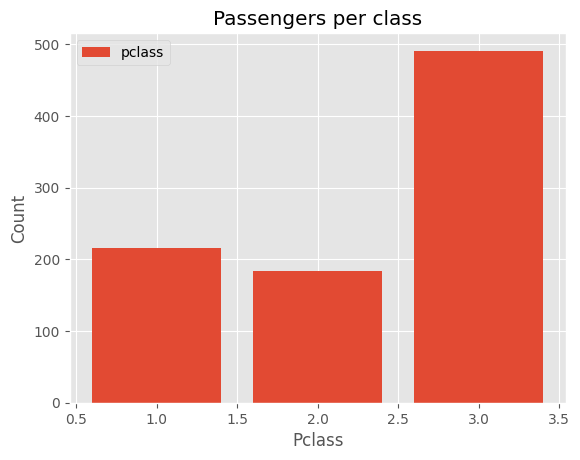

In [78]:
#Plot of passengers per class
pclass_counts = dt['pclass'].value_counts()


# Create a bar plot
plt.bar(pclass_counts.index, pclass_counts)
plt.legend(['pclass'])  # Provide the legend label as a list
plt.title('Passengers per class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


4.2 Bar Graph of Death by Class

Construct a bar graph to visualize the number of deaths by passenger class, either side by side or stacked, to examine the relationship between socio-economic status and survival.

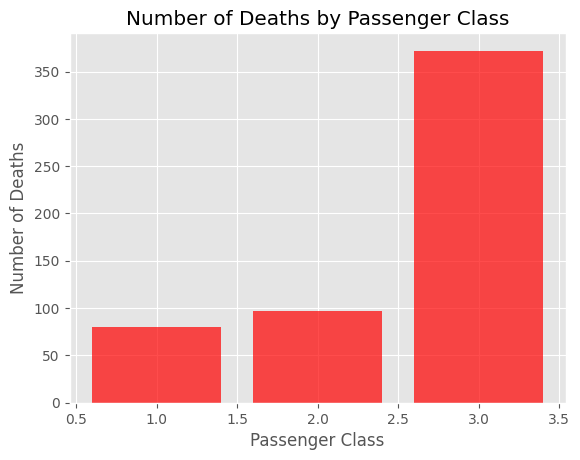

In [77]:
# Plotting the bar graph
death_counts = dt[dt['survived'] == 0].groupby('pclass').size()
plt.bar(death_counts.index, death_counts, color='red', alpha=0.7)
plt.title('Number of Deaths by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Deaths')
plt.show()



4.3 Bar Graph of Survivors by Class

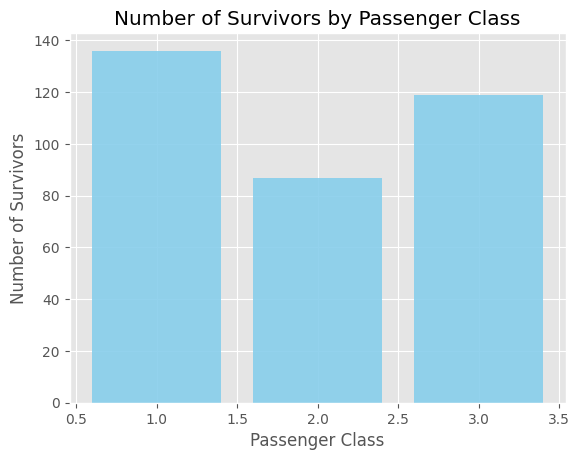

In [76]:
# Plotting the bar graph
death_counts = dt[dt['survived'] == 1].groupby('pclass').size()
plt.bar(death_counts.index, death_counts, color='skyblue', alpha=0.9)
plt.title('Number of Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.show()

5. Conclusion

Based on your visualizations and analysis, discuss the factors that influenced survival rates on the Titanic. Consider the impact of age, gender, and passenger class, and how these factors interacted to determine survival outcomes.

Total Passengers

class3: 491

class2: 184

class1: 216

Death record per class

class3:  375

class2: 98

class1: 78

Number of survivors per class

class3: 116

class2: 86

class1: 138

Percent difference of survivora per total passengers



In [100]:
class3= 116/491*100
class3

23.625254582484725

In [98]:
class2= 86/184*100
class2

46.73913043478261

In [99]:
class1= 138/216*100
class1

63.888888888888886

class1 has 63% survivors, class2 has 47% survivors, and class 3 has only 23% survivors. Based on the above figures, we can conclude that socio-economic status and survival rate are highly correlated.